# Load Datasets

In [3]:
import pandas as pd 


df_day = pd.read_csv("day.csv")

In [4]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# EDA Analysis

In [5]:
print("HOUR Dataset Shape:", df_day.shape)
print("\nHOUR Columns:\n", df_day.columns)
print("\nHOUR Info:")
print(df_day.info())
print("\nHOUR Null Values:")
print(df_day.isnull().sum())
print("\nHOUR Null Values:")
print(df_day.isnull().sum().sum())
print("HOUR Duplicate Rows:", df_day.duplicated().sum())
print("\nHOUR Statistics:\n", df_day.describe())

HOUR Dataset Shape: (731, 16)

HOUR Columns:
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

HOUR Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual    

<Axes: title={'center': 'Missing Values in Hour Dataset'}>

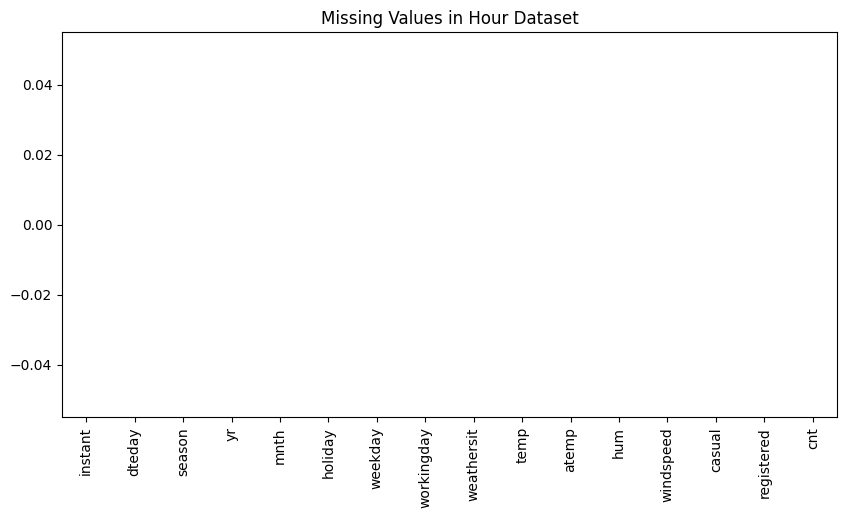

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



# plt.show()

plt.figure(figsize=(10,5))
df_day.isnull().sum().plot(kind='bar', title='Missing Values in Hour Dataset')
# plt.show()

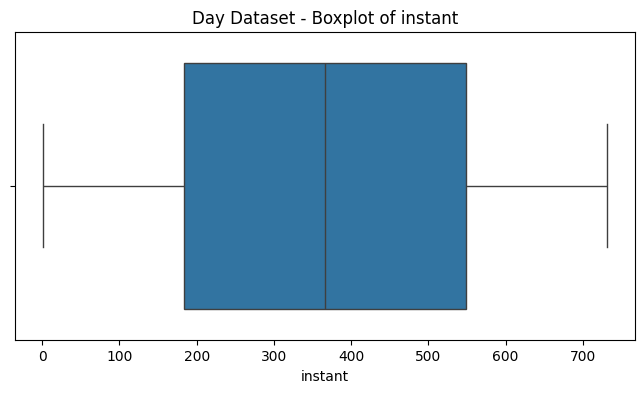

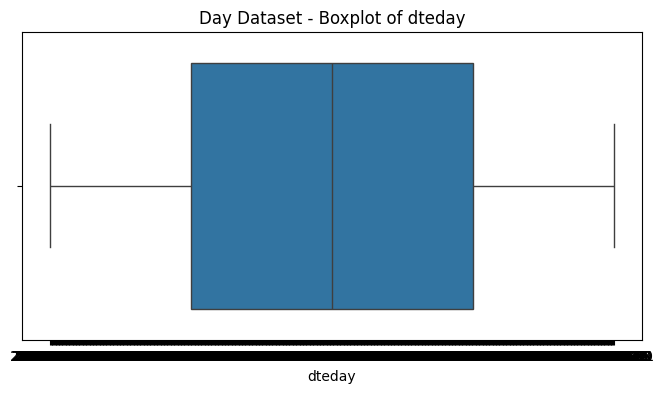

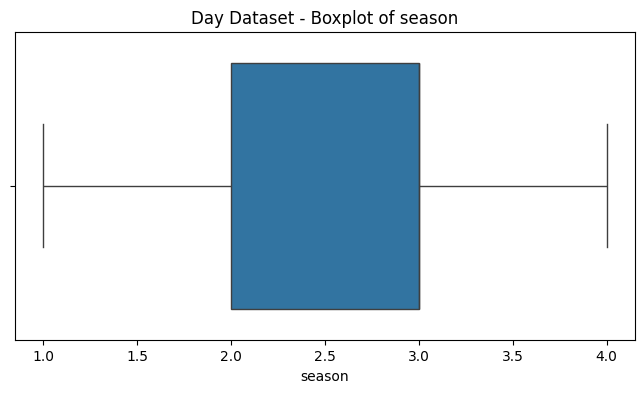

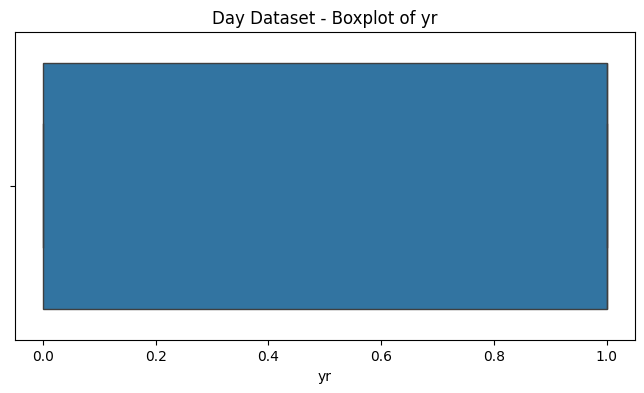

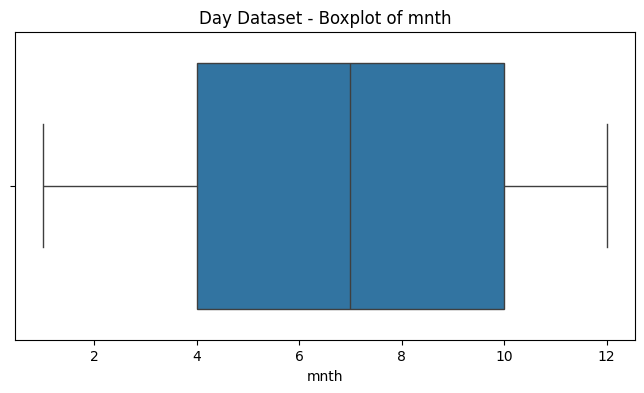

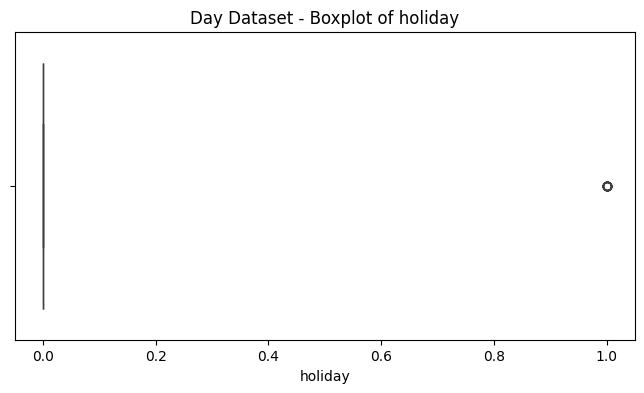

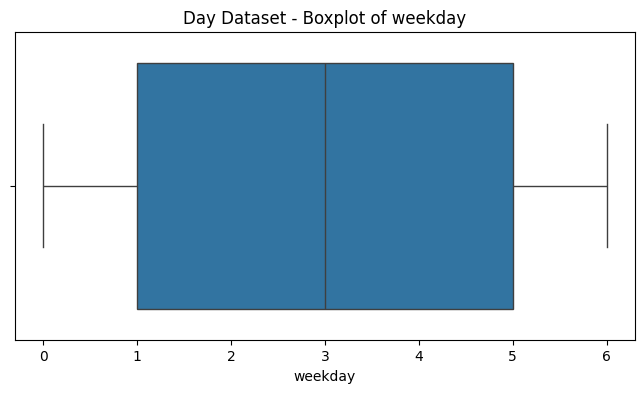

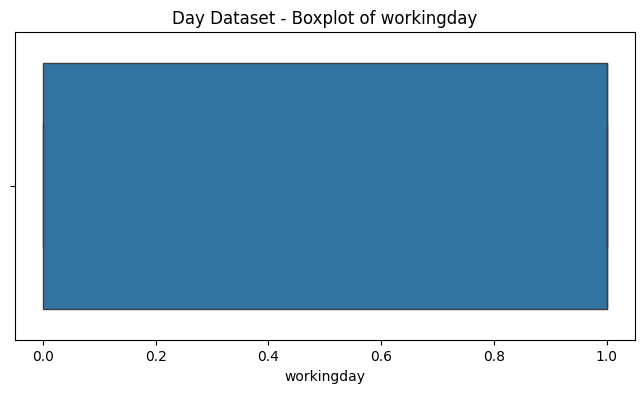

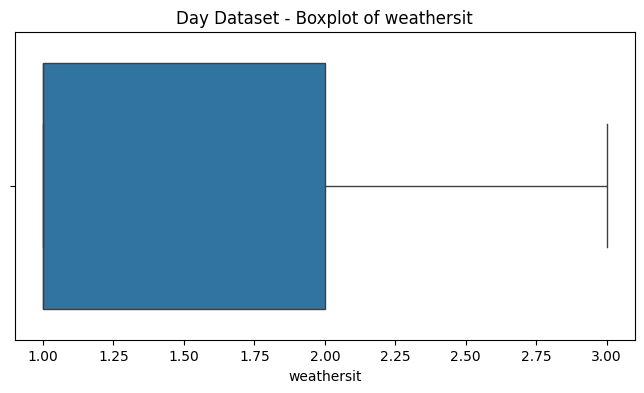

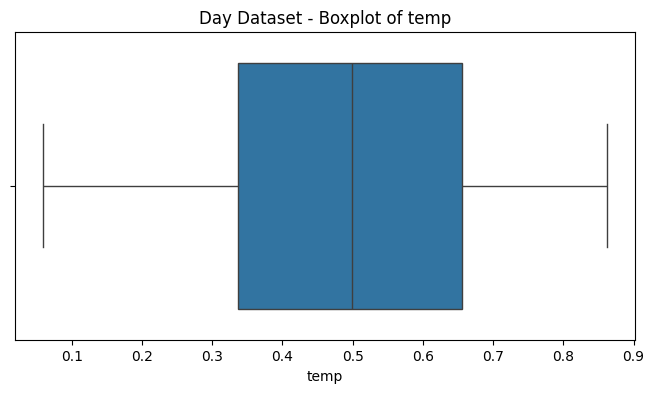

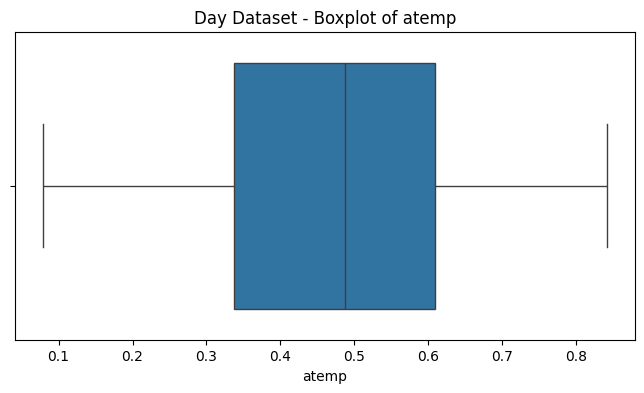

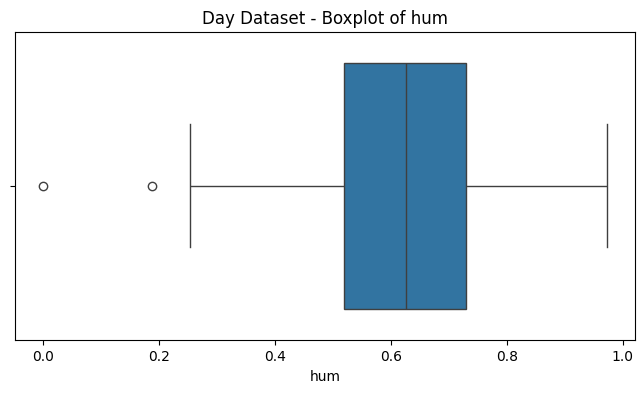

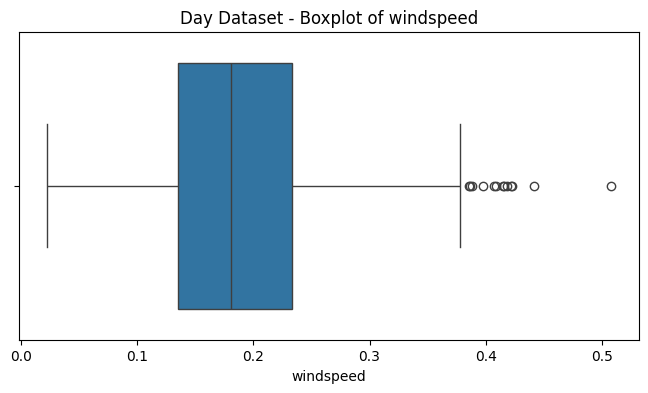

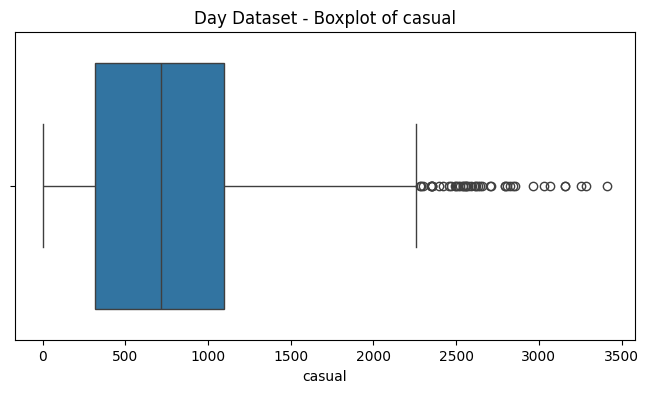

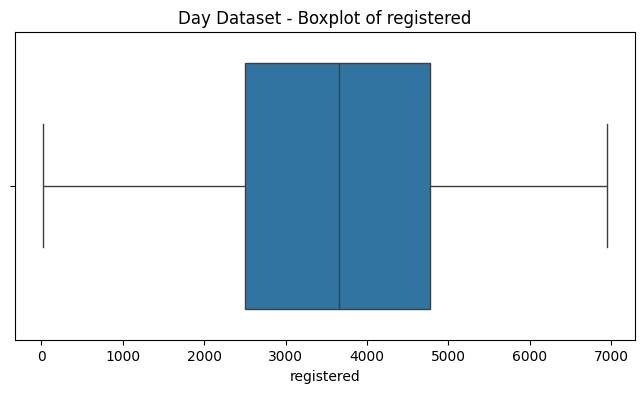

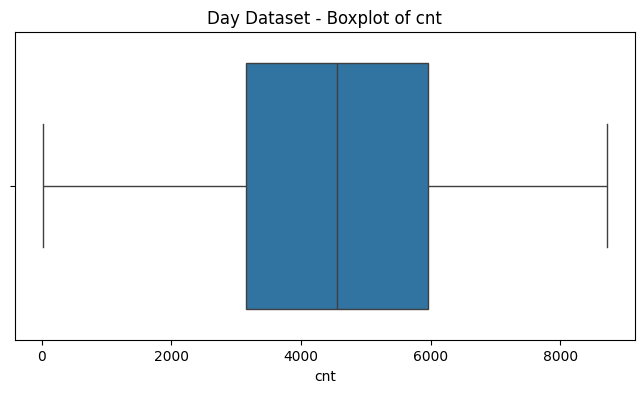

In [7]:
num_cols_day = ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']
for col in num_cols_day:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df_day[col])
    plt.title(f"Day Dataset - Boxplot of {col}")
    plt.show()

In [8]:
df_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
df_day['dteday'].dtype
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

# Remove Unwanted Column

In [10]:
cols_to_remove_day = ['instant', 'dteday', 'yr', 'casual', 'registered']

df_day = df_day.drop(columns=cols_to_remove_day, errors='ignore')


# Outlier Detection

In [11]:
import pandas as pd


num_cols_day = df_day.select_dtypes(include=['float64', 'int64']).columns
num_cols_day = num_cols_day.drop('cnt')


for col in num_cols_day:
    Q1 = df_day[col].quantile(0.25)
    Q3 = df_day[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_day = df_day[(df_day[col] >= lower) & (df_day[col] <= upper)]

In [12]:
df_day.isnull().sum()


season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

# Training


HOUR RESULTS
MAE: 956.4700559773909
R2 Score: 0.5646734409541763

HOUR MODEL PERFORMANCE
Training R2 Score : 0.9498529575129355
Testing  R2 Score : 0.5646734409541763


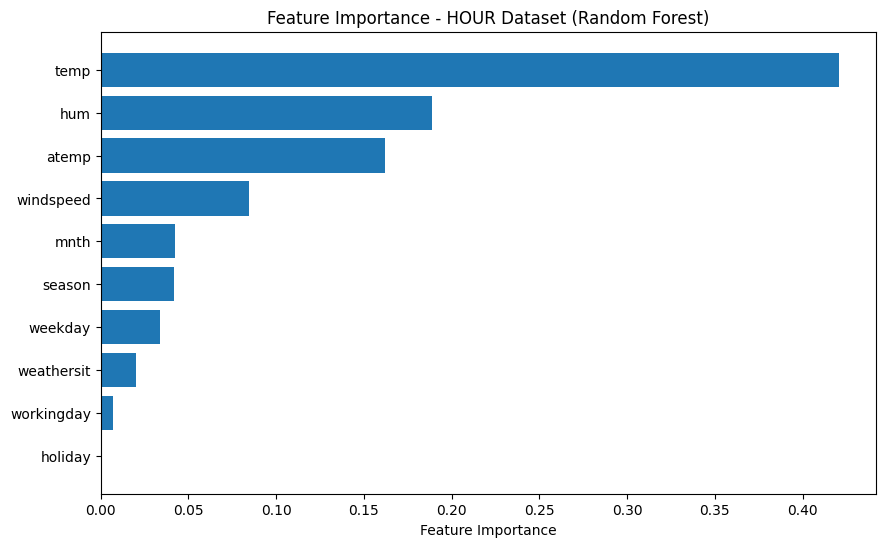

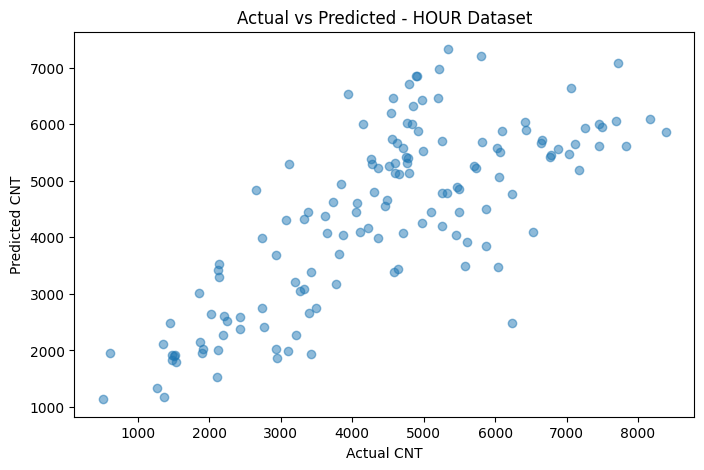

In [13]:

X_day = df_day.drop('cnt', axis=1)
y_day = df_day['cnt']


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X_day, y_day, test_size=0.2, random_state=42)


rf_hour = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    random_state=42
)


rf_hour.fit(X_train, y_train)


y_pred_hour = rf_hour.predict(X_test)


print("\nHOUR RESULTS")
print("MAE:", mean_absolute_error(y_test, y_pred_hour))
print("R2 Score:", r2_score(y_test, y_pred_hour))
y_train_pred = rf_hour.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# ---- Testing performance ----
y_test_pred = rf_hour.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

print("\nHOUR MODEL PERFORMANCE")
print("Training R2 Score :", train_r2)
print("Testing  R2 Score :", test_r2)


importances = rf_hour.feature_importances_
features = X_day.columns

indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), features[indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance - HOUR Dataset (Random Forest)")
plt.show()



plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_hour, alpha=0.5)
plt.xlabel("Actual CNT")
plt.ylabel("Predicted CNT")
plt.title("Actual vs Predicted - HOUR Dataset")
plt.show()


               Model  Train R2 (Accuracy)  Test R2 (Accuracy)    Train MAE  \
1      Random Forest             0.895926            0.568662   530.083491   
2  Gradient Boosting             0.895857            0.486478   525.582898   
0  Linear Regression             0.530066            0.465153  1145.371710   
3            XGBoost             0.999998            0.454674     2.213937   

      Test MAE  
1   957.981426  
2  1072.782435  
0  1039.040260  
3  1063.101889  

BEST MODEL
Model                  Random Forest
Train R2 (Accuracy)         0.895926
Test R2 (Accuracy)          0.568662
Train MAE                 530.083491
Test MAE                  957.981426
Name: 1, dtype: object


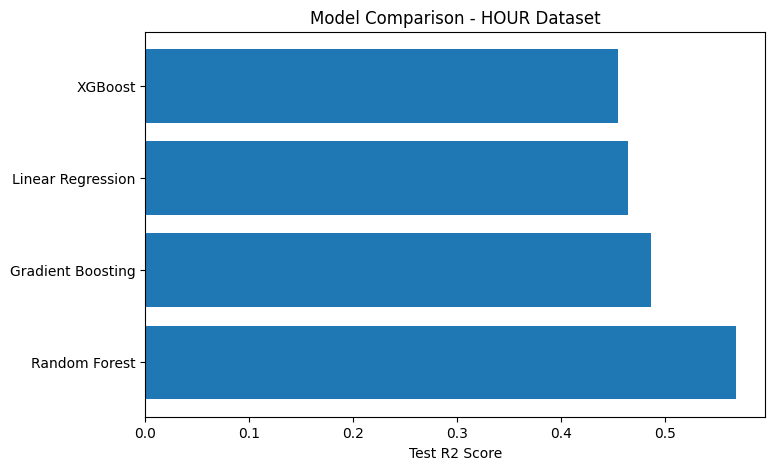

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from xgboost import XGBRegressor

X = df_day.drop('cnt', axis=1)
y = df_day['cnt']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models = {
    "Linear Regression": LinearRegression(),

    "Random Forest": RandomForestRegressor(
        n_estimators=300,
        max_depth=10,
        min_samples_leaf=2,
        min_samples_split=5,
        random_state=42
    ),

    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.1,
        random_state=42
    ),

    "XGBoost": XGBRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=8,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        objective="reg:squarederror"
    )
}
results = []

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Metrics
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)

    results.append([
        name,
        train_r2,
        test_r2,
        train_mae,
        test_mae
    ])
results_df = pd.DataFrame(
    results,
    columns=[
        "Model",
        "Train R2 (Accuracy)",
        "Test R2 (Accuracy)",
        "Train MAE",
        "Test MAE"
    ]
)

results_df = results_df.sort_values(
    by="Test R2 (Accuracy)",
    ascending=False
)

print(results_df)
best_model = results_df.iloc[0]
print("\nBEST MODEL")
print(best_model)
plt.figure(figsize=(8,5))
plt.barh(
    results_df["Model"],
    results_df["Test R2 (Accuracy)"]
)
plt.xlabel("Test R2 Score")
plt.title("Model Comparison - HOUR Dataset")
plt.show()


# Hyperparameter tuning

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}


rf = RandomForestRegressor(
    random_state=42
)


grid_rf = GridSearchCV(
    rf,
    param_grid_rf,
    cv=3,
    scoring="r2",
    n_jobs=-1
)


grid_rf.fit(X_train, y_train)


print("Best Random Forest Parameters:", grid_rf.best_params_)
print("Best CV R2 Score:", grid_rf.best_score_)


Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best CV R2 Score: 0.6183871828811004


In [16]:

import joblib
model =  RandomForestRegressor(
        n_estimators=300,
        max_depth=20,
        min_samples_leaf=1,
        min_samples_split=5,
        random_state=42
    )

model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

    # Metrics
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)

print("Training accuracy " ,train_r2)
print("Test accuracy " ,test_r2)
print("Training MAE " ,train_mae)
print("Testing  MAE " ,train_mae)

joblib.dump(model, "Randomforest_day_model1.pkl")
joblib.dump(X.columns.tolist(), "Randomforest_features1.pkl")
print("Model saved RANDOM FOREST 1")


Training accuracy  0.9277197677265001
Test accuracy  0.5643264919391544
Training MAE  441.143665837318
Testing  MAE  441.143665837318
Model saved RANDOM FOREST 1


# Perform Predictions

In [17]:
def predict_next_days(current_data, days=7):
    import joblib
    import pandas as pd

    model = joblib.load("Randomforest_day_model1.pkl")
    feature_names = joblib.load("Randomforest_features1.pkl")

    base_weekday = current_data["weekday"]
    predictions = {}

    for i in range(days):
        future = current_data.copy()

        # Update weekday
        future_weekday = (base_weekday + i) % 7
        future["weekday"] = future_weekday

        # Update working day
        future["workingday"] = 0 if future_weekday in [0, 6] else 1

        # Assume no holidays
        future["holiday"] = 0

        X = pd.DataFrame([future])[feature_names]
        pred = model.predict(X)[0]

        predictions[f"day+{i}"] = int(pred)

    return predictions



--- DAY-WISE BIKE DEMAND INPUT ---

Enter the day 


Enter the day  3


Season: 1=Spring, 2=Summer, 3=Fall, 4=Winter


Enter season (1-4):  2



Month (1-12)


Enter month:  1



Weekday:
0=Sunday, 1=Monday, 2=Tuesday, 3=Wednesday,
4=Thursday, 5=Friday, 6=Saturday


Enter weekday (0-6):  1



Holiday:


Is it a holiday? (0=No, 1=Yes):  1



Weather:
1=Clear, 2=Mist, 3=Light Rain/Snow, 4=Heavy Rain


Enter weather (1-4):  1

Temperature (0-1):  1
Feels-like temperature (0-1):  11
Humidity (0-1):  1
Windspeed (0-1):  1



Day-wise Forecast:
day+0 → 2464
day+1 → 2406
day+2 → 2403
day+3 → 2404
day+4 → 2408
day+5 → 2413
day+6 → 2476


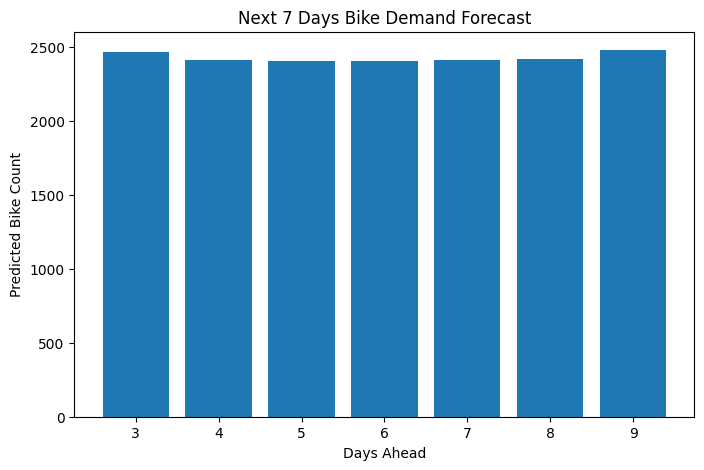

In [18]:
def get_day_user_input():
    print("\n--- DAY-WISE BIKE DEMAND INPUT ---\n")
    print("Enter the day ")
    day = int(input("Enter the day "))
    print("Season: 1=Spring, 2=Summer, 3=Fall, 4=Winter")
    season = int(input("Enter season (1-4): "))

    print("\nMonth (1-12)")
    mnth = int(input("Enter month: "))

    print("\nWeekday:")
    print("0=Sunday, 1=Monday, 2=Tuesday, 3=Wednesday,")
    print("4=Thursday, 5=Friday, 6=Saturday")
    weekday = int(input("Enter weekday (0-6): "))

    print("\nHoliday:")
    holiday = int(input("Is it a holiday? (0=No, 1=Yes): "))

    print("\nWeather:")
    print("1=Clear, 2=Mist, 3=Light Rain/Snow, 4=Heavy Rain")
    weathersit = int(input("Enter weather (1-4): "))

    temp = float(input("\nTemperature (0-1): "))
    atemp = float(input("Feels-like temperature (0-1): "))
    hum = float(input("Humidity (0-1): "))
    windspeed = float(input("Windspeed (0-1): "))

    workingday = 0 if weekday in [0, 6] or holiday == 1 else 1

    return {
        "season": season,
        "mnth": mnth,
        "holiday": holiday,
        "weekday": weekday,
        "workingday": workingday,
        "weathersit": weathersit,
        "temp": temp,
        "atemp": atemp,
        "hum": hum,
        "windspeed": windspeed
    },day
import matplotlib.pyplot as plt

current_data,day = get_day_user_input()
day_preds = predict_next_days(current_data, days=7)
days=[]
for i in range(7):
    if day > 31 :
        day = 1
    days.append(day)
    day+=1
print("\nDay-wise Forecast:")
for d, v in day_preds.items():
    print(d, "→", v)

plt.figure(figsize=(8,5))
plt.bar(days, day_preds.values())
plt.xlabel("Days Ahead")
plt.ylabel("Predicted Bike Count")
plt.title("Next 7 Days Bike Demand Forecast")
plt.show()


In [45]:
import pandas as pd 


df_day = pd.read_csv("day.csv")

In [46]:
df_day.shape

(731, 16)

In [47]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day.info()
df_day['dteday'].dtype




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

dtype('<M8[ns]')

In [48]:
# Make sure data is sorted by date
df_day = df_day.sort_values('dteday')

# Lag features
df_day['cnt_lag1'] = df_day['cnt'].shift(1)
df_day['cnt_lag7'] = df_day['cnt'].shift(7)

# Rolling feature
df_day['rolling_mean_7'] = df_day['cnt'].rolling(7).mean()

# Remove rows with NaN values
df_day.dropna(inplace=True)

print(df_day.shape)


(724, 19)


In [49]:
cols_to_remove_day = ['instant', 'dteday', 'yr', 'casual', 'registered']

df_day = df_day.drop(columns=cols_to_remove_day, errors='ignore')

               Model  Train R2 (Accuracy)  Test R2 (Accuracy)   Train MAE  \
3            XGBoost             1.000000            0.885049    0.292431   
2  Gradient Boosting             0.983455            0.863741  191.467980   
1      Random Forest             0.968988            0.860946  229.753415   
0  Linear Regression             0.864366            0.851595  522.535601   

     Test MAE  
3  428.004717  
2  473.510064  
1  469.782121  
0  543.118206  

BEST MODEL
Model                     XGBoost
Train R2 (Accuracy)           1.0
Test R2 (Accuracy)       0.885049
Train MAE                0.292431
Test MAE               428.004717
Name: 3, dtype: object


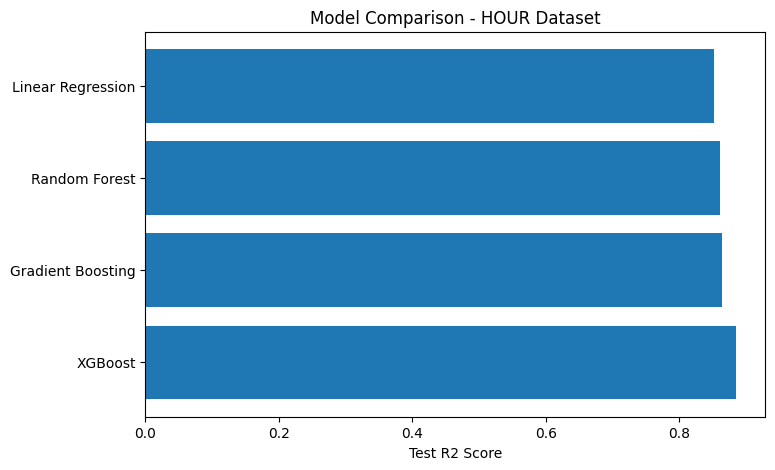

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from xgboost import XGBRegressor

X = df_day.drop('cnt', axis=1)
y = df_day['cnt']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models = {
    "Linear Regression": LinearRegression(),

    "Random Forest": RandomForestRegressor(
        n_estimators=300,
        max_depth=10,
        min_samples_leaf=2,
        min_samples_split=5,
        random_state=42
    ),

    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.1,
        random_state=42
    ),

    "XGBoost": XGBRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=8,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        objective="reg:squarederror"
    )
}
results = []

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Metrics
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)

    results.append([
        name,
        train_r2,
        test_r2,
        train_mae,
        test_mae
    ])
results_df = pd.DataFrame(
    results,
    columns=[
        "Model",
        "Train R2 (Accuracy)",
        "Test R2 (Accuracy)",
        "Train MAE",
        "Test MAE"
    ]
)

results_df = results_df.sort_values(
    by="Test R2 (Accuracy)",
    ascending=False
)

print(results_df)
best_model = results_df.iloc[0]
print("\nBEST MODEL")
print(best_model)
plt.figure(figsize=(8,5))
plt.barh(
    results_df["Model"],
    results_df["Test R2 (Accuracy)"]
)
plt.xlabel("Test R2 Score")
plt.title("Model Comparison - HOUR Dataset")
plt.show()


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

X = df_day.drop(columns=['cnt', 'dteday'], errors='ignore')
y = df_day['cnt']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=False
)

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=15,
    min_samples_leaf=5,
    min_samples_split=10,
    random_state=42
)

rf.fit(X_train, y_train)
joblib.dump(model, "Randomforest_day_model.pkl")
joblib.dump(X.columns.tolist(), "Randomforest_features.pkl")
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

print("RANDOM FOREST REGRESSION RESULTS\n")

print("Train R2 :", round(r2_score(y_train, train_pred), 4))
print("Test  R2 :", round(r2_score(y_test, test_pred), 4))

print("Train MAE:", round(mean_absolute_error(y_train, train_pred), 2))
print("Test  MAE:", round(mean_absolute_error(y_test, test_pred), 2))




RANDOM FOREST REGRESSION RESULTS

Train R2 : 0.9465
Test  R2 : 0.7138
Train MAE: 283.25
Test  MAE: 721.12



--- ENTER CURRENT DAY DETAILS ---



Enter current day number (1-31):  23
Season (1=Spring, 2=Summer, 3=Fall, 4=Winter):  3
Month (1-12):  11
Holiday (0=No, 1=Yes):  0
Weekday (0=Sun, 6=Sat):  3
Working Day (0=No, 1=Yes):  0
Weather (1=Clear, 2=Mist, 3=Light Rain):  2
Temperature (normalized):  0.23
Feels Like Temp (normalized):  0.45
Humidity (normalized):  0.256
Windspeed (normalized):  0.23



--- NEXT 5 DAYS BIKE DEMAND FORECAST ---
Day 23: 3139
Day 24: 2996
Day 25: 3154
Day 26: 3104
Day 27: 3305


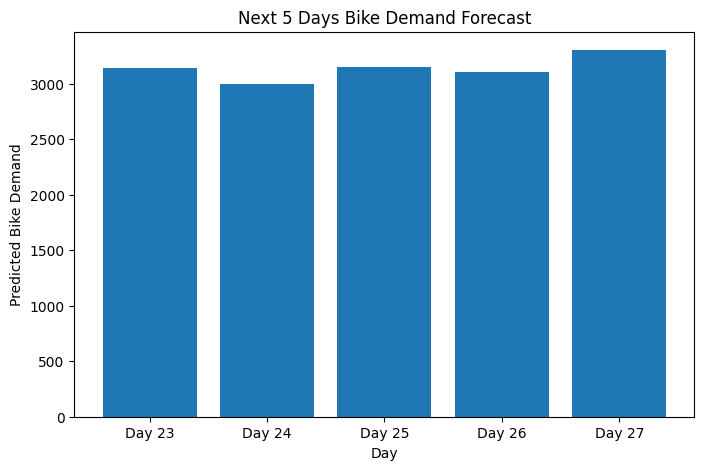

In [52]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

def get_user_input():
    print("\n--- ENTER CURRENT DAY DETAILS ---\n")

    data = {}
    data["day"] = int(input("Enter current day number (1-31): "))
    data["season"] = int(input("Season (1=Spring, 2=Summer, 3=Fall, 4=Winter): "))
    data["mnth"] = int(input("Month (1-12): "))
    data["holiday"] = int(input("Holiday (0=No, 1=Yes): "))
    data["weekday"] = int(input("Weekday (0=Sun, 6=Sat): "))
    data["workingday"] = int(input("Working Day (0=No, 1=Yes): "))
    data["weathersit"] = int(input("Weather (1=Clear, 2=Mist, 3=Light Rain): "))
    data["temp"] = float(input("Temperature (normalized): "))
    data["atemp"] = float(input("Feels Like Temp (normalized): "))
    data["hum"] = float(input("Humidity (normalized): "))
    data["windspeed"] = float(input("Windspeed (normalized): "))

    
    data["cnt_lag1"] = 2000
    data["cnt_lag7"] = 3500
    data["rolling_mean_7"] = 3000

    return data


def predict_next_5_days(current_data):
    model = joblib.load("Randomforest_day_model.pkl")
    feature_names = joblib.load("Randomforest_features.pkl")

    predictions = []
    day_labels = []

    last = current_data.copy()
    current_day = current_data["day"]

    for _ in range(5):
        future = last.copy()

        # Update calendar day (wrap 31 → 1)
        
        if current_day > 31:
            current_day = 1

        day_labels.append(f"Day {current_day}")
        current_day += 1
        # Update weekday
        future["weekday"] = (future["weekday"] + 1) % 7

        # Update working day
        future["workingday"] = 0 if future["weekday"] in [0, 6] else 1

        # Assume no holiday
        future["holiday"] = 0

        X = pd.DataFrame([future])[feature_names]
        pred = int(model.predict(X)[0])
        predictions.append(pred)

        # Update lag features
        last["cnt_lag7"] = last["cnt_lag1"]
        last["cnt_lag1"] = pred
        last["rolling_mean_7"] = (last["rolling_mean_7"] * 6 + pred) / 7

    return day_labels, predictions


# ---------------- MAIN ----------------
user_data = get_user_input()
days, forecast = predict_next_5_days(user_data)

print("\n--- NEXT 5 DAYS BIKE DEMAND FORECAST ---")
for d, p in zip(days, forecast):
    print(f"{d}: {p}")

# ---------------- VISUALIZATION ----------------
plt.figure(figsize=(8, 5))
plt.bar(days, forecast)
plt.xlabel("Day")
plt.ylabel("Predicted Bike Demand")
plt.title("Next 5 Days Bike Demand Forecast")
plt.show()
